In [2]:
import lib
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

DATA_DIR = os.path.join(lib.basic.DATA_DIR(), 'myelin_grad')

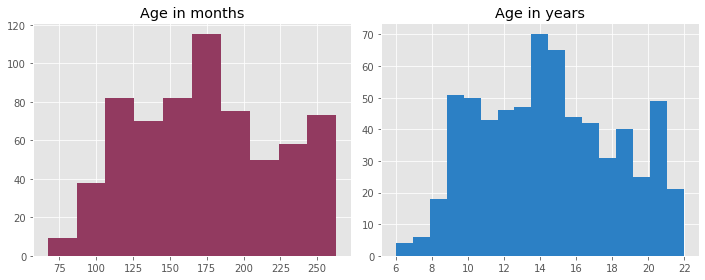

In [23]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(lib.basic.SUB_INFO_DF['Age in months'], color='#923a60')
axes[0].set_title('Age in months')
axes[1].hist(lib.basic.SUB_INFO_DF['Age in years'], bins=17, color='#2c80c5')
axes[1].set_title('Age in years')
fig.tight_layout()
plt.show()

In [4]:
# Loading myelination maps
regions = ['cb', 'cc', 'sc']
maps = {region: pd.read_pickle(os.path.join(DATA_DIR, f'{region}_maps.pickle')) for region in regions}
mean_maps = {}

In [64]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mean_maps['cb'] = lib.myelin.get_mean_maps_of_ages(maps['cb'])

/nfs/e2/workingshop/dengguangyu/HCP/lib/myelin.py:99: RuntimeWarning: Mean of empty slice
  mean_maps[age] = np.nanmean(data, axis = 0)
/nfs/e2/workingshop/dengguangyu/HCP/lib/myelin.py:99: RuntimeWarning: Mean of empty slice
  mean_maps[age] = np.nanmean(data, axis = 0)


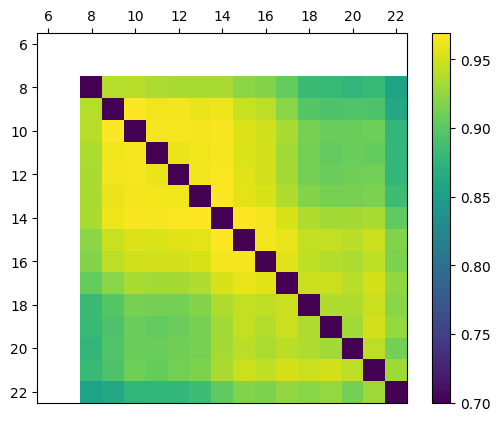

In [43]:
lib.util.plot_corr_mat(mean_maps['cb'], 0.7)

In [45]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mean_maps['cc'] = lib.myelin.get_mean_maps_of_ages(maps['cc'])

/nfs/e2/workingshop/dengguangyu/HCP/lib/myelin.py:99: RuntimeWarning: Mean of empty slice
  mean_maps[age] = np.nanmean(data, axis = 0)
/nfs/e2/workingshop/dengguangyu/HCP/lib/myelin.py:99: RuntimeWarning: Mean of empty slice
  mean_maps[age] = np.nanmean(data, axis = 0)


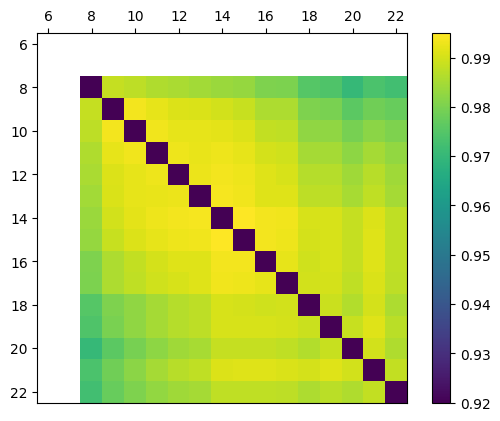

In [46]:
lib.util.plot_corr_mat(mean_maps['cc'], 0.92)

In [47]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mean_maps['sc'] = lib.myelin.get_mean_maps_of_ages(maps['sc'])

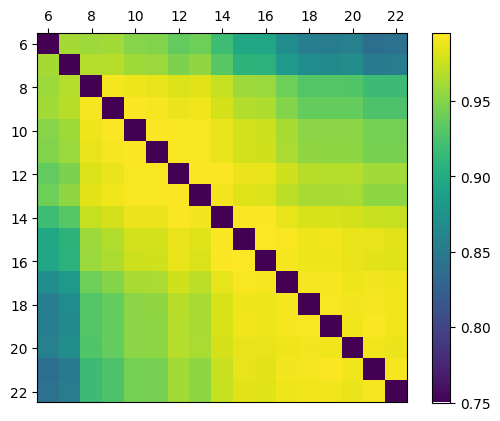

In [52]:
lib.util.plot_corr_mat(mean_maps['sc'], 0.75)

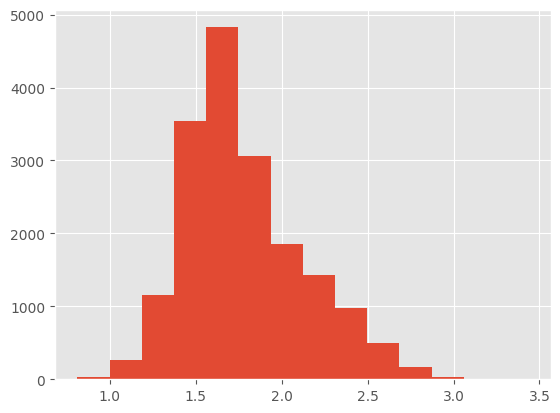

In [71]:
plt.style.use('ggplot')
plt.figure()
plt.hist(mean_maps['cb'][7], bins=14)
plt.show()

In [9]:
group6_maps = np.row_stack(maps['cb'][maps['cb']['age'] == 6]['data'])

In [22]:
np.where(group6_maps > 20)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3]),
 array([  116, 11832, 12264, 15136, 16230, 16246, 16614, 17720, 17807,
        17848,  7729,  7749,  7769,  7788,  7790,  7791,  7810,  8086,
         8111,  8112,  8130,  8152,  8153,  8171,  8172,  8173,  8192,
         8212,  8441,  8464,  8467,  8490,  8491,  8510,  8511,  8527,
         8528,  8549,  8766,  8789,  8813,  8814,  8834,  8835,  8836,
         8857,  8882, 10627, 10646,  7469,  9203, 15859]))

In [ ]:
DIY_COLOURS = ['#923a60', '#2c80c5', ]